# Tutorial: Functions on LCAs

This is an interactive tutorial written with real code.
We start by setting up $\LaTeX$ printing, and importing the classes `LCA`, `Homomorphism` and `LCAFunc`.

In [1]:
# Imports from abelianLCAFunc
from abelian import LCA, Homomorphism, LCAFunc

# Other imports
import matplotlib.pyplot as plt
from IPython.display import display, Math
import math

def show(arg):
    return display(Math(arg.to_latex()))

## Initializing a new function

There are two ways to create a function $f: G \to \mathbb{C}$:

* On general LCAs $G$, the function can be represented by an **analytical expression**
* If $G = \mathbb{Z}_{\mathbf{p}}$ with $p_i \geq 1$ for every $i$ ($G$ is a direct sum of discrete groups with finite period), a **table of values** (multidimensional array) can also be used

### With an analytical representation

If the representation of the function is given by an analytical expression, initialization is simple.

Below we define a gaussian function on $\mathbb{Z}$, and one on $T$.

In [2]:
def gaussian(vector_arg, k = 0.1):
    return math.exp(-sum(i**2 for i in vector_arg)*k)

# Gaussian function on Z
Z = LCA([0])
gauss_on_Z = LCAFunc(gaussian, domain = Z)
print(gauss_on_Z) # Printing
show(gauss_on_Z) # LaTeX output

# Gaussian function on T
T = LCA([1], [False])
gauss_on_T = LCAFunc(gaussian, domain = T)
show(gauss_on_T) # LaTeX output

LCAFunc (gaussian) on domain [Z]


<IPython.core.display.Math object>

<IPython.core.display.Math object>

Notice in the above that the `print` built-in and the `to_latex()` method will show human-readable output.

### With a table of values

Functions on $\mathbb{Z}_\mathbf{p}$ can be defined using a table of values, if $p_i \geq 1$ for every $p_i \in \mathbf{p}$.

In [3]:
# Create a table of values
table_data = [[1,2,3,4,5],
              [2,3,4,5,6],
              [3,4,5,6,7]]

# Create a domain matching the table
domain = LCA([3, 5])

table_func = LCAFunc(table_data, domain)
show(table_func)

<IPython.core.display.Math object>

## Function evaluation

A function $f \in \mathbb{C}^G$ is callable.
To call (i.e. evaluate) a function,
pass it an element in the group.

In [4]:
# An element in Z
element = [0]

# Evaluate the function
gauss_on_Z(element)

1.0

The `sample()` method can be used to sample a function on a list of poits in the domain.

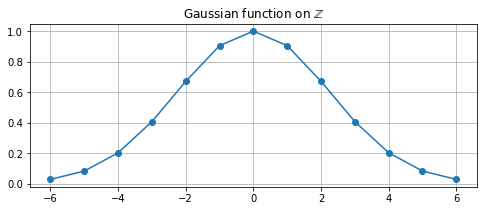

In [5]:
# Create a list of sample points [-6, ..., 6]
sample_points = [[i] for i in range(-6, 7)]

# Sample the function, returns a list of values
sampled_func = gauss_on_Z.sample(sample_points)

# Plot the result of sampling the function
plt.figure(figsize = (8, 3))
plt.title('Gaussian function on $\mathbb{Z}$')
plt.plot(sample_points, sampled_func, '-o')
plt.grid(True)
plt.show()

## Shifts

If $f: G \to \mathbb{C}$ be a function. The shift operator (or translation operator) $S_{h}$ is defined as

$$S_{h}[f(g)] = f(g - h).$$

The shift operator shifts $f(g)$ by $h$, where $h, g \in G$.

The shift operator is implemented as a method called `shift`.

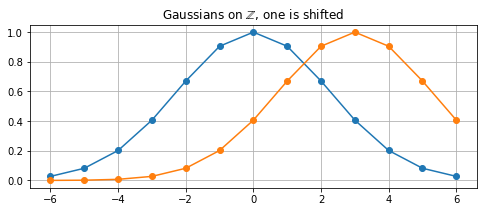

In [6]:
# The group element to shift by
shift_by = [3]

# Shift the function
shifted_gauss = gauss_on_Z.shift(shift_by)

# Create sample poits and sample
sample_points = [[i] for i in range(-6, 7)]
sampled1 = gauss_on_Z.sample(sample_points)
sampled2 = shifted_gauss.sample(sample_points)

# Create a plot
plt.figure(figsize = (8, 3))
ttl = 'Gaussians on $\mathbb{Z}$, one is shifted'
plt.title(ttl)
plt.plot(sample_points, sampled1, '-o')
plt.plot(sample_points, sampled2, '-o')
plt.grid(True)
plt.show()

## Pullbacks

Let $\phi: G \to H$ be a homomorphism and let $f:H \to \mathbb{C}$ be a function. The pullback of $f$ along $\phi$, denoted $\phi^*(f)$,
is defined as

$$\phi^*(f) := f \circ \phi.$$

The pullback "moves" the domain of the function $f$ to $G$, i.e. $\phi^*(f) : G \to \mathbb{C}$. The pullback is of `f` is calculated using the `pullback` method, as shown below.

In [7]:
def linear(arg):
    return sum(arg)

# The original function
f = LCAFunc(linear, LCA([10]))
show(f)

# A homomorphism phi
phi = Homomorphism([2], target = [10])
show(phi)

# The pullback of f along phi
g = f.pullback(phi)
show(g)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

We now sample the functions and plot them.

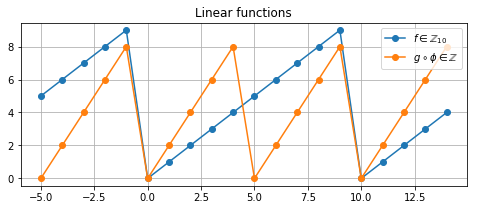

In [8]:
# Sample the functions and plot them
sample_points = [[i] for i in range(-5, 15)]
f_sampled = f.sample(sample_points)
g_sampled = g.sample(sample_points)

# Plot the original function and the pullback
plt.figure(figsize = (8, 3))
plt.title('Linear functions')
label = '$f \in \mathbb{Z}_{10}$'
plt.plot(sample_points, f_sampled, '-o', label = label)
label = '$g \circ \phi \in \mathbb{Z}$'
plt.plot(sample_points, g_sampled, '-o', label = label)
plt.grid(True)
plt.legend(loc = 'best')
plt.show()

## Pushforwards

Let $\phi: G \to H$ be a epimorphism and let $f:G \to \mathbb{C}$ be a function. The pushfoward of $f$ along $\phi$, denoted $\phi_*(f)$,
is defined as

$$(\phi_*(f))(g) := \sum_{k \in \operatorname{ker}\phi} f(k + h), \quad \phi(g) = h$$

The pullback "moves" the domain of the function $f$ to $H$, i.e. $\phi_*(f) : H \to \mathbb{C}$. First a solution is obtained, then we sum over the kernel. Since such a sum could in principle be infite, we bound it using a norm. Below is an example where we

* Define a gaussian $f(x) = \exp(-kx^2)$ on $\mathbb{Z}$
* Use pushfoward to "move" it with $\phi(g) = g \in \operatorname{Hom}(\mathbb{Z}, \mathbb{Z}_{10})$

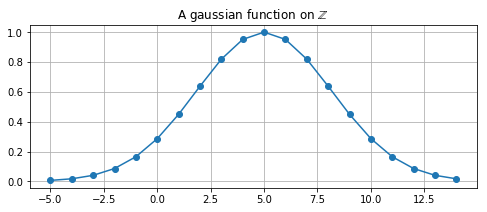

In [9]:
# We create a function on Z and plot it
def gaussian(arg, k = 0.05):
    """
    A gaussian function.
    """
    return math.exp(-sum(i**2 for i in arg)*k)

# Create gaussian on Z, shift it by 5
gauss_on_Z = LCAFunc(gaussian, LCA([0]))
gauss_on_Z = gauss_on_Z.shift([5])

# Sample points and sampled function
s_points = [[i] for i in range(-5, 15)]
f_sampled = gauss_on_Z.sample(s_points)

# Plot it
plt.figure(figsize = (8, 3))
plt.title('A gaussian function on $\mathbb{Z}$')
plt.plot(s_points, f_sampled, '-o')
plt.grid(True)
plt.show()

In [10]:
# Use a pushforward to periodize the function
phi = Homomorphism([1], target = [10])
show(phi)

<IPython.core.display.Math object>

First we do a pushforward with a norm condition that is too tight. **Not enough terms are present** in the sum to capture what the pushforward would look like if the sum went to infinity.

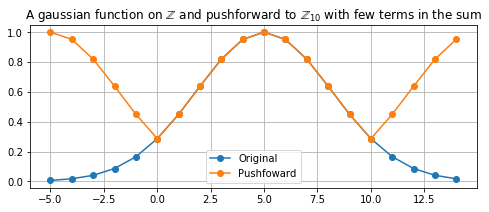

In [11]:
terms = 1

# Pushforward of the function along phi
gauss_on_Z_10 = gauss_on_Z.pushforward(phi, terms)

# Sample the functions and plot them
pushforward_sampled = gauss_on_Z_10.sample(sample_points)

plt.figure(figsize = (8, 3))
label = 'A gaussian function on $\mathbb{Z}$ and \
pushforward to $\mathbb{Z}_{10}$ with few terms in the sum'
plt.title(label)
plt.plot(s_points, f_sampled, '-o', label ='Original')
plt.plot(s_points, pushforward_sampled, '-o', label ='Pushfoward')
plt.legend(loc = 'best')
plt.grid(True)
plt.show()

Next we do a pushforward with a norm condition that allows more terms in the sum, this captures what the pushforward would look like if the sum went to infinity.

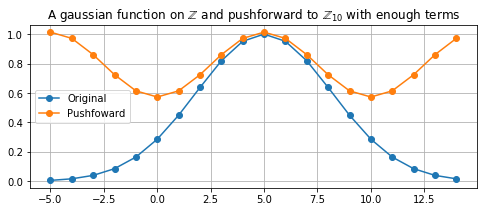

In [12]:
terms = 9

gauss_on_Z_10 = gauss_on_Z.pushforward(phi, terms)

# Sample the functions and plot them
pushforward_sampled = gauss_on_Z_10.sample(sample_points)

plt.figure(figsize = (8, 3))
plt.title('A gaussian function on $\mathbb{Z}$ and \
pushforward to $\mathbb{Z}_{10}$ with enough terms')
plt.plot(s_points, f_sampled, '-o', label ='Original')
plt.plot(s_points, pushforward_sampled, '-o', label ='Pushfoward')
plt.legend(loc = 'best')
plt.grid(True)
plt.show()